In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# fig, ax = plt.subplots()
# ax.axis('off')
G = nx.Graph()  # an undirected graph object

for i in range(6): G.add_node(i + 1)

G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(3, 1)
G.add_edge(3, 2)
G.add_edge(4, 5)
G.add_edge(4, 6)
G.add_edge(5, 4)
G.add_edge(5, 6)
G.add_edge(6, 4)
G.add_edge(3, 5)
spring_layout_for_G = nx.spring_layout(G, seed=100) # position of nodes not random
# nx.draw_networkx(G, pos=spring_layout_for_G)
# fig.savefig('./plots/Simple_pagerank_G.png', format='PNG')

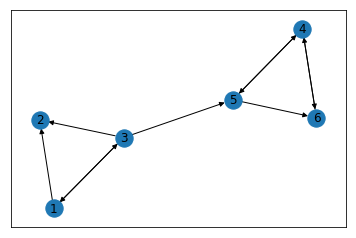

In [3]:
fig2, ax = plt.subplots()
# ax.axis('off')
G = nx.DiGraph()  # a directed graph object
for i in range(6): G.add_node(i + 1)

G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(3, 1)
G.add_edge(3, 2)
G.add_edge(4, 5)
G.add_edge(4, 6)
G.add_edge(5, 4)
G.add_edge(5, 6)
G.add_edge(6, 4)
G.add_edge(3, 5)
nx.draw_networkx(G, pos=spring_layout_for_G)
# fig2.savefig('./plots/Simple_pagerank_DiGraph.png', format='PNG')

In [4]:
H = nx.adjacency_matrix(G).astype(float)
out_degree_for_nodes_of_G = G.out_degree
for i, j in zip(H.nonzero()[0], H.nonzero()[1]):
    try:
        H[i, j] = 1. / out_degree_for_nodes_of_G[i + 1]
    except ZeroDivisionError:
        print("non zero elements appear to be zero")

In [5]:
alphas = np.zeros(H.shape[0])
zero_indexes = np.where(H.getnnz(1)==0)
for i in zero_indexes[0]:
    alphas[i] = 1.0
alphas

array([0., 1., 0., 0., 0., 0.])

In [6]:
epsilons = np.ones(H.shape[0])
one_over_n_epsilons = epsilons/H.shape[0]
one_over_n_epsilons

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

In [7]:
c = 0.85
c*H

<6x6 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [8]:
_.todense()

matrix([[0.        , 0.425     , 0.425     , 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.28333333, 0.28333333, 0.        , 0.        , 0.28333333,
         0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.425     ,
         0.425     ],
        [0.        , 0.        , 0.        , 0.425     , 0.        ,
         0.425     ],
        [0.        , 0.        , 0.        , 0.85      , 0.        ,
         0.        ]])

In [9]:
right_vector = c * alphas + (1.0 - c) * epsilons
right_vector

array([0.15, 1.  , 0.15, 0.15, 0.15, 0.15])

In [25]:
google_matr = c*H + np.dot(right_vector[:,None],one_over_n_epsilons[None,:])
google_matr

matrix([[0.025     , 0.45      , 0.45      , 0.025     , 0.025     ,
         0.025     ],
        [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
         0.16666667],
        [0.30833333, 0.30833333, 0.025     , 0.025     , 0.30833333,
         0.025     ],
        [0.025     , 0.025     , 0.025     , 0.025     , 0.45      ,
         0.45      ],
        [0.025     , 0.025     , 0.025     , 0.45      , 0.025     ,
         0.45      ],
        [0.025     , 0.025     , 0.025     , 0.875     , 0.025     ,
         0.025     ]])

In [15]:
nx.google_matrix(G)

matrix([[0.025     , 0.45      , 0.45      , 0.025     , 0.025     ,
         0.025     ],
        [0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
         0.16666667],
        [0.30833333, 0.30833333, 0.025     , 0.025     , 0.30833333,
         0.025     ],
        [0.025     , 0.025     , 0.025     , 0.025     , 0.45      ,
         0.45      ],
        [0.025     , 0.025     , 0.025     , 0.45      , 0.025     ,
         0.45      ],
        [0.025     , 0.025     , 0.025     , 0.875     , 0.025     ,
         0.025     ]])

In [118]:
pi0 = google_matr.shape[0]*[1/google_matr.shape[0]] # elements 1/n
pi0 = np.array(pi0)
print('iteration: 0\n', pi0)
print('\n')
for i in range(10):
    pi_new = np.matmul(pi0, google_matr)
    print(f'iteration: {i+1}\n', pi_new)
    print('\n')
    pi0 = pi_new

iteration: 0
 [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


iteration: 1
 [[0.09583333 0.16666667 0.11944444 0.26111111 0.16666667 0.19027778]]


iteration: 2
 [[0.0824537  0.12318287 0.08934028 0.28118056 0.19342593 0.23041667]]


iteration: 3
 [[0.06776399 0.10280681 0.07749373 0.32051109 0.18726572 0.24415866]]


iteration: 4
 [[0.06152086 0.09032055 0.06836399 0.32668709 0.19773807 0.25536944]]


iteration: 5
 [[0.05716521 0.08331157 0.06394177 0.33889812 0.19600722 0.2606761 ]]


iteration: 6
 [[0.05491931 0.07921452 0.06109769 0.34168023 0.19895101 0.26413724]]


iteration: 7
 [[0.05353307 0.07687377 0.05956276 0.34529289 0.19874717 0.26599033]]


iteration: 8
 [[0.05276657 0.07551812 0.05864201 0.34644978 0.19951605 0.26710748]]


iteration: 9
 [[0.05231364 0.07473943 0.05812419 0.34753408 0.19955479 0.26773388]]


iteration: 10
 [[0.05205661 0.0742899  0.05782138 0.34797267 0.19975859 0.26810085]]




In [116]:
nx.pagerank(G)

{1: 0.05170556259095014,
 2: 0.07368068204240268,
 3: 0.05741336396912545,
 4: 0.34870204607252414,
 5: 0.19990341577794055,
 6: 0.26859492954705705}